<a href="https://colab.research.google.com/github/navyavemavarapu/Task_6/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain vs. Body weight

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.                 

Tasks                                                                     
1. Find the linear regression equation for this data for brain weight to body weight.                                                                     
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("/content/brain_body.txt")

In [ ]:
df.head(3)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1


# Data cleaning

In [ ]:
df.isnull().sum() # no null values

Brain    0
Body     0
dtype: int64

In [ ]:
df.duplicated().sum()#no duplicates in the data

0

In [ ]:
df.dtypes#data is structured

Brain    float64
Body     float64
dtype: object

In [ ]:
df.describe() #There are outliers in the data

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


Visualizing outliers through box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'OUTLIERS')

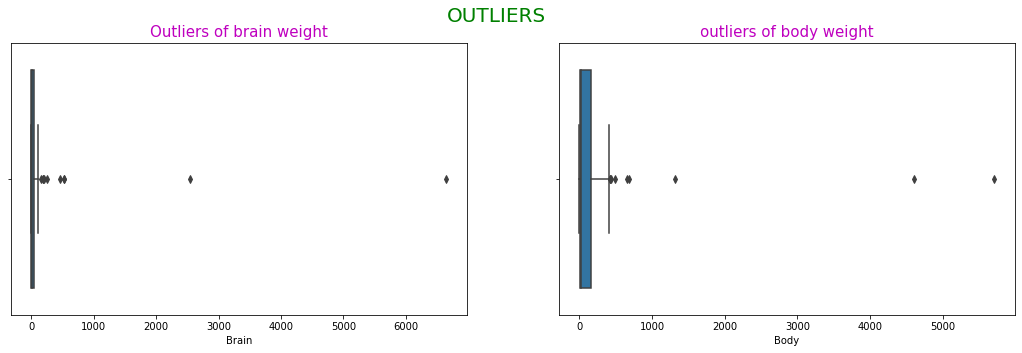

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot('Brain',data=df)
plt.title("Outliers of brain weight",color='m',size=15)
plt.subplot(1,2,2)
sns.boxplot('Body',data=df)
plt.title("outliers of body weight",color='m',size=15)
plt.suptitle("OUTLIERS",color='g',size=20)

# IQR based outlier filtering

In [ ]:
percentile25_brain = df['Brain'].quantile(0.25)
percentile75_brain = df['Brain'].quantile(0.75)
iqr_brain=percentile75_brain - percentile25_brain
print("IQR for brain weight is ",iqr_brain)
print("25th Percentile of the brain weight data is :",percentile25_brain)
print("75th Percentile of the brain weight data is :",percentile75_brain)
print("**************************************************************")
percentile25_body = df['Body'].quantile(0.25)
percentile75_body = df['Body'].quantile(0.75)
iqr_body=percentile75_body - percentile25_body
print("IQR for brain weight is ",iqr_body)
print("25th Percentile of the body weight data is :",percentile25_body)
print("75th Percentile of the body weight data is :",percentile75_body)

IQR for brain weight is  47.6025
25th Percentile of the brain weight data is : 0.6000000000000001
75th Percentile of the brain weight data is : 48.2025
**************************************************************
IQR for brain weight is  161.75
25th Percentile of the body weight data is : 4.25
75th Percentile of the body weight data is : 166.0


In [ ]:
upper_limit_brain = percentile75_brain + 1.5 * iqr_brain
lower_limit_brain = percentile25_brain - 1.5 * iqr_brain
print("Highest allowed brain weight is :",upper_limit_brain)
print("Lowest allowed brain weight is :",lower_limit_brain)
print("****************************************************")
upper_limit_body = percentile75_body + 1.5 * iqr_body
lower_limit_body = percentile25_body - 1.5 * iqr_body
print("Highest allowed brain weight is :",upper_limit_body)
print("Lowest allowed brain weight is :",lower_limit_body)

Highest allowed brain weight is : 119.60625
Lowest allowed brain weight is : -70.80375000000001
****************************************************
Highest allowed brain weight is : 408.625
Lowest allowed brain weight is : -238.375


In [ ]:
df[(df['Brain'] > upper_limit_brain) | (df['Brain'] < lower_limit_brain)]

,Brain,Body
3,465.0,423.0
18,2547.0,4603.0
20,187.1,419.0
21,521.0,655.0
27,529.0,680.0
28,207.0,406.0
32,6654.0,5712.0
41,250.0,490.0
55,192.0,180.0
57,160.0,169.0


# Capping

Filling the outliers with upper and lower limits

In [ ]:
df['Brain'] = np.where(df['Brain']>upper_limit_brain,upper_limit_brain,df['Brain'])
df['Brain'] = np.where(df['Brain']<lower_limit_brain,lower_limit_brain,df['Brain'])

In [ ]:
df['Body'] = np.where(df['Body']>upper_limit_body,upper_limit_body,df['Body'])
df['Body'] = np.where(df['Body']<lower_limit_body,lower_limit_body,df['Body'])

Cross checking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'OUTLIERS')

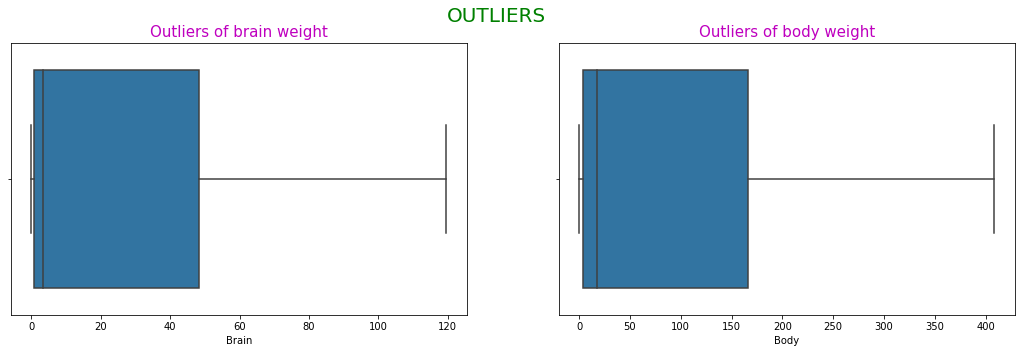

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot('Brain',data=df)
plt.title("Outliers of brain weight",color='m',size=15)
plt.subplot(1,2,2)
sns.boxplot('Body',data=df)
plt.title("Outliers of body weight",color='m',size=15)
plt.suptitle("OUTLIERS",color='g',size=20)

# EDA

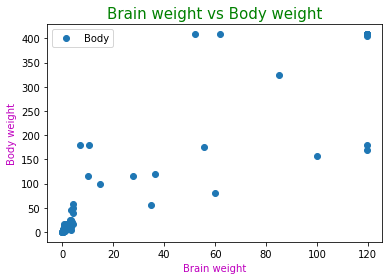

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


In [ ]:
df.plot(x='Brain',y='Body',style='o')
plt.title('Brain weight vs Body weight',color='g',size=15)
plt.xlabel('Brain weight',color='m')
plt.ylabel('Body weight',color='m')
plt.show()
df.corr()

There is a linear relationship between Brain weight and Body weight. So we can go ahead and develop a linear regression model. No transformation required.

In [ ]:
X = df[['Brain']]
y = df['Body']

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
line_regg = LinearRegression()
line_regg.fit(X,y)

LinearRegression()

In [ ]:
y_pred = line_regg.predict(X)

# Find the linear regression equation for this data for brain weight to body weight.

In [ ]:
c = line_regg.intercept_
print("The intercept value is :", c)

The intercept value is : 19.481655744388803


In [ ]:
m = line_regg.coef_
print("The value of coefficient (m) is :",m)

The value of coefficient (m) is : [2.91998516]


In [ ]:
print("Linear regression equation for the given data is: Predicted Body weight = Brain weight *", m ,"+",c) 

Linear regression equation for the given data is: Predicted Body weight = Brain weight * [2.91998516] + 19.481655744388803


# Chart the original data and the equation on the chart.

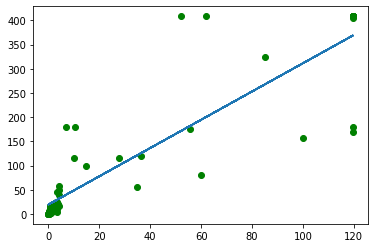

In [ ]:
plt.scatter(X,y,color="green")
plt.plot(X,y_pred)

# Find the equation's R2 score to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.7889701643052389
